# Random Forest Regressor

In [48]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
# Load driver standings
standings_df = pd.read_csv("driver_standings.csv")

In [50]:
# Feature engineering: Create meaningful features
standings_df['constructor_encoded'] = standings_df['constructor'].factorize()[0]

In [51]:
# Select features and target
features = standings_df[['points', 'wins', 'constructor_encoded']]
target = standings_df['position']

In [52]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [53]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Make predictions on test data
predictions = model.predict(X_test)

In [55]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error on Test Data: {mae}")

Mean Absolute Error on Test Data: 1.6179999999999999


In [56]:
# Prepare data for Abu Dhabi GP prediction
abu_dhabi_features = standings_df[['points', 'wins', 'constructor_encoded']]
abu_dhabi_predictions = model.predict(abu_dhabi_features)

In [57]:
# Add predictions to the DataFrame
standings_df['predicted_score'] = abu_dhabi_predictions

In [58]:
# Assign distinct integer positions by sorting predicted scores
standings_df = standings_df.sort_values(by='predicted_score', ascending=True).reset_index(drop=True)
standings_df['predicted_position'] = standings_df.index + 1  # Rank positions from 1 onwards

In [59]:
# Save predictions with distinct positions
standings_df.to_csv("abu_dhabi_predictions.csv", index=False)
print("Saved Abu Dhabi predictions to 'abu_dhabi_predictions.csv'")

Saved Abu Dhabi predictions to 'abu_dhabi_predictions.csv'


In [60]:
# Display the contents of a CSV file
df = pd.read_csv("abu_dhabi_predictions.csv")
print(df)  # Print the table as plain text

          driver_id  position  points  wins     constructor  \
0            norris         2   349.0     3         McLaren   
1    max_verstappen         1   429.0     9        Red Bull   
2           leclerc         3   341.0     3         Ferrari   
3           piastri         4   291.0     2         McLaren   
4             sainz         5   272.0     2         Ferrari   
5           russell         6   235.0     2        Mercedes   
6          hamilton         7   211.0     2        Mercedes   
7             perez         8   152.0     0        Red Bull   
8            alonso         9    68.0     0    Aston Martin   
9        hulkenberg        10    37.0     0    Haas F1 Team   
10            gasly        11    36.0     0  Alpine F1 Team   
11          tsunoda        12    30.0     0      RB F1 Team   
12           stroll        13    24.0     0    Aston Martin   
13             ocon        14    23.0     0  Alpine F1 Team   
14  kevin_magnussen        15    16.0     0    Haas F1 

In [61]:
# Evaluate model on test data
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1.6179999999999999
Mean Squared Error (MSE): 2.76102
R² Score: 0.9227902684563758


# Gradient Boosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
# STEP 1: Train Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [64]:
# STEP 2: Make Predictions
gb_predictions = gradient_boosting_model.predict(X_test)

In [65]:
# STEP 3: Evaluate Gradient Boosting Regressor
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [66]:
# STEP 4: Predict for Abu Dhabi GP
abu_dhabi_gb_predictions = gradient_boosting_model.predict(abu_dhabi_features)

In [67]:
# Save predictions
standings_df['gb_predicted_score'] = abu_dhabi_gb_predictions
standings_df = standings_df.sort_values(by='gb_predicted_score', ascending=True).reset_index(drop=True)
standings_df['gb_predicted_position'] = standings_df.index + 1
standings_df.to_csv("abu_dhabi_gb_predictions.csv", index=False)
print("Saved Abu Dhabi predictions using Gradient Boosting to 'abu_dhabi_gb_predictions.csv'")

Saved Abu Dhabi predictions using Gradient Boosting to 'abu_dhabi_gb_predictions.csv'


In [68]:
# Display the contents of a CSV file
df = pd.read_csv("abu_dhabi_predictions.csv")
print(df)  # Print the table as plain text

          driver_id  position  points  wins     constructor  \
0            norris         2   349.0     3         McLaren   
1    max_verstappen         1   429.0     9        Red Bull   
2           leclerc         3   341.0     3         Ferrari   
3           piastri         4   291.0     2         McLaren   
4             sainz         5   272.0     2         Ferrari   
5           russell         6   235.0     2        Mercedes   
6          hamilton         7   211.0     2        Mercedes   
7             perez         8   152.0     0        Red Bull   
8            alonso         9    68.0     0    Aston Martin   
9        hulkenberg        10    37.0     0    Haas F1 Team   
10            gasly        11    36.0     0  Alpine F1 Team   
11          tsunoda        12    30.0     0      RB F1 Team   
12           stroll        13    24.0     0    Aston Martin   
13             ocon        14    23.0     0  Alpine F1 Team   
14  kevin_magnussen        15    16.0     0    Haas F1 

In [69]:
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.9800910027412314
Mean Squared Error (MSE): 1.0237685709689173
R² Score: 0.9227902684563758


## Support Vector Regression

In [70]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [71]:
# STEP 1: Scale Features and Initialize SVR
# SVR benefits from scaled data, so we use StandardScaler with SVR
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

In [72]:
# STEP 2: Train the SVR Model
svr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [73]:
# STEP 3: Make Predictions
svr_predictions = svr_model.predict(X_test)

In [74]:
# STEP 4: Evaluate the SVR Model
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)


In [75]:
# STEP 5: Predict for Abu Dhabi GP
abu_dhabi_svr_predictions = svr_model.predict(abu_dhabi_features)

In [76]:
# Save predictions
standings_df['svr_predicted_score'] = abu_dhabi_svr_predictions
standings_df = standings_df.sort_values(by='svr_predicted_score', ascending=True).reset_index(drop=True)
standings_df['svr_predicted_position'] = standings_df.index + 1
standings_df.to_csv("abu_dhabi_svr_predictions.csv", index=False)
print("Saved Abu Dhabi predictions using Support Vector Regression to 'abu_dhabi_svr_predictions.csv'")

Saved Abu Dhabi predictions using Support Vector Regression to 'abu_dhabi_svr_predictions.csv'


In [77]:
# Display the contents of a CSV file
df = pd.read_csv("abu_dhabi_predictions.csv")
print(df)  # Print the table as plain text

          driver_id  position  points  wins     constructor  \
0            norris         2   349.0     3         McLaren   
1    max_verstappen         1   429.0     9        Red Bull   
2           leclerc         3   341.0     3         Ferrari   
3           piastri         4   291.0     2         McLaren   
4             sainz         5   272.0     2         Ferrari   
5           russell         6   235.0     2        Mercedes   
6          hamilton         7   211.0     2        Mercedes   
7             perez         8   152.0     0        Red Bull   
8            alonso         9    68.0     0    Aston Martin   
9        hulkenberg        10    37.0     0    Haas F1 Team   
10            gasly        11    36.0     0  Alpine F1 Team   
11          tsunoda        12    30.0     0      RB F1 Team   
12           stroll        13    24.0     0    Aston Martin   
13             ocon        14    23.0     0  Alpine F1 Team   
14  kevin_magnussen        15    16.0     0    Haas F1 

In [78]:
# Print evaluation metrics
print("=== Support Vector Regression Metrics ===")
print(f"Mean Absolute Error (MAE): {svr_mae}")
print(f"Mean Squared Error (MSE): {svr_mse}")
print(f"R² Score: {svr_r2}")

=== Support Vector Regression Metrics ===
Mean Absolute Error (MAE): 4.698112090490458
Mean Squared Error (MSE): 30.019888347727893
R² Score: 0.16051766365414177


## Neural Network Regression 

In [79]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [80]:
# STEP 1: Scale Features and Initialize MLP Regressor
# MLP Regressor works better when data is scaled, so we use StandardScaler
mlp_model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
)

In [81]:
# STEP 2: Train the MLP Regressor
mlp_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000,
                              random_state=42))])

In [82]:
# STEP 3: Make Predictions
mlp_predictions = mlp_model.predict(X_test)

In [83]:
# STEP 4: Evaluate the MLP Regressor
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)

In [84]:
# STEP 5: Predict for Abu Dhabi GP
abu_dhabi_mlp_predictions = mlp_model.predict(abu_dhabi_features)

In [85]:
# Save predictions
standings_df['mlp_predicted_score'] = abu_dhabi_mlp_predictions
standings_df = standings_df.sort_values(by='mlp_predicted_score', ascending=True).reset_index(drop=True)
standings_df['mlp_predicted_position'] = standings_df.index + 1
standings_df.to_csv("abu_dhabi_mlp_predictions.csv", index=False)
print("Saved Abu Dhabi predictions using Neural Network (MLP) to 'abu_dhabi_mlp_predictions.csv'")

Saved Abu Dhabi predictions using Neural Network (MLP) to 'abu_dhabi_mlp_predictions.csv'


In [86]:
# Display the contents of a CSV file
df = pd.read_csv("abu_dhabi_predictions.csv")
print(df)  # Print the table as plain text

          driver_id  position  points  wins     constructor  \
0            norris         2   349.0     3         McLaren   
1    max_verstappen         1   429.0     9        Red Bull   
2           leclerc         3   341.0     3         Ferrari   
3           piastri         4   291.0     2         McLaren   
4             sainz         5   272.0     2         Ferrari   
5           russell         6   235.0     2        Mercedes   
6          hamilton         7   211.0     2        Mercedes   
7             perez         8   152.0     0        Red Bull   
8            alonso         9    68.0     0    Aston Martin   
9        hulkenberg        10    37.0     0    Haas F1 Team   
10            gasly        11    36.0     0  Alpine F1 Team   
11          tsunoda        12    30.0     0      RB F1 Team   
12           stroll        13    24.0     0    Aston Martin   
13             ocon        14    23.0     0  Alpine F1 Team   
14  kevin_magnussen        15    16.0     0    Haas F1 

In [87]:
# Print evaluation metrics
print("=== Neural Network (MLP Regressor) Metrics ===")
print(f"Mean Absolute Error (MAE): {mlp_mae}")
print(f"Mean Squared Error (MSE): {mlp_mse}")
print(f"R² Score: {mlp_r2}")

=== Neural Network (MLP Regressor) Metrics ===
Mean Absolute Error (MAE): 4.550938699565668
Mean Squared Error (MSE): 23.393796616247755
R² Score: 0.34581105659262434


## Linear Regression


In [88]:
from sklearn.linear_model import LinearRegression

# STEP 1: Initialize Linear Regression
linear_model = LinearRegression()

# STEP 2: Train the Linear Regression Model
linear_model.fit(X_train, y_train)

# STEP 3: Make Predictions
linear_predictions = linear_model.predict(X_test)

# STEP 4: Evaluate the Linear Regression Model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Print evaluation metrics
print("=== Linear Regression Metrics ===")
print(f"Mean Absolute Error (MAE): {linear_mae}")
print(f"Mean Squared Error (MSE): {linear_mse}")
print(f"R² Score: {linear_r2}")

# STEP 5: Predict for Abu Dhabi GP
abu_dhabi_linear_predictions = linear_model.predict(abu_dhabi_features)

# Save predictions
standings_df['linear_predicted_score'] = abu_dhabi_linear_predictions
standings_df = standings_df.sort_values(by='linear_predicted_score', ascending=True).reset_index(drop=True)
standings_df['linear_predicted_position'] = standings_df.index + 1
standings_df.to_csv("abu_dhabi_linear_predictions.csv", index=False)
print("Saved Abu Dhabi predictions using Linear Regression to 'abu_dhabi_linear_predictions.csv'")


=== Linear Regression Metrics ===
Mean Absolute Error (MAE): 4.680813899254431
Mean Squared Error (MSE): 24.427430835621408
R² Score: 0.3169062965430256
Saved Abu Dhabi predictions using Linear Regression to 'abu_dhabi_linear_predictions.csv'


In [89]:
# Display the contents of a CSV file
df = pd.read_csv("abu_dhabi_predictions.csv")
print(df)  # Print the table as plain text

          driver_id  position  points  wins     constructor  \
0            norris         2   349.0     3         McLaren   
1    max_verstappen         1   429.0     9        Red Bull   
2           leclerc         3   341.0     3         Ferrari   
3           piastri         4   291.0     2         McLaren   
4             sainz         5   272.0     2         Ferrari   
5           russell         6   235.0     2        Mercedes   
6          hamilton         7   211.0     2        Mercedes   
7             perez         8   152.0     0        Red Bull   
8            alonso         9    68.0     0    Aston Martin   
9        hulkenberg        10    37.0     0    Haas F1 Team   
10            gasly        11    36.0     0  Alpine F1 Team   
11          tsunoda        12    30.0     0      RB F1 Team   
12           stroll        13    24.0     0    Aston Martin   
13             ocon        14    23.0     0  Alpine F1 Team   
14  kevin_magnussen        15    16.0     0    Haas F1 

## K- Nearest Neighbour 

In [90]:
from sklearn.neighbors import KNeighborsRegressor

# STEP 1: Initialize KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')

# STEP 2: Train the KNN Regressor
knn_model.fit(X_train, y_train)

# STEP 3: Make Predictions
knn_predictions = knn_model.predict(X_test)

# STEP 4: Evaluate the KNN Regressor
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Print evaluation metrics
print("=== K-Nearest Neighbors (KNN) Metrics ===")
print(f"Mean Absolute Error (MAE): {knn_mae}")
print(f"Mean Squared Error (MSE): {knn_mse}")
print(f"R² Score: {knn_r2}")

# STEP 5: Predict for Abu Dhabi GP
abu_dhabi_knn_predictions = knn_model.predict(abu_dhabi_features)

# Save predictions
standings_df['knn_predicted_score'] = abu_dhabi_knn_predictions
standings_df = standings_df.sort_values(by='knn_predicted_score', ascending=True).reset_index(drop=True)
standings_df['knn_predicted_position'] = standings_df.index + 1
standings_df.to_csv("abu_dhabi_knn_predictions.csv", index=False)
print("Saved Abu Dhabi predictions using KNN to 'abu_dhabi_knn_predictions.csv'")


=== K-Nearest Neighbors (KNN) Metrics ===
Mean Absolute Error (MAE): 2.266259571392093
Mean Squared Error (MSE): 5.830097994283284
R² Score: 0.8369659397571789
Saved Abu Dhabi predictions using KNN to 'abu_dhabi_knn_predictions.csv'


In [91]:
# Display the contents of a CSV file
df = pd.read_csv("abu_dhabi_predictions.csv")
print(df)  # Print the table as plain text

          driver_id  position  points  wins     constructor  \
0            norris         2   349.0     3         McLaren   
1    max_verstappen         1   429.0     9        Red Bull   
2           leclerc         3   341.0     3         Ferrari   
3           piastri         4   291.0     2         McLaren   
4             sainz         5   272.0     2         Ferrari   
5           russell         6   235.0     2        Mercedes   
6          hamilton         7   211.0     2        Mercedes   
7             perez         8   152.0     0        Red Bull   
8            alonso         9    68.0     0    Aston Martin   
9        hulkenberg        10    37.0     0    Haas F1 Team   
10            gasly        11    36.0     0  Alpine F1 Team   
11          tsunoda        12    30.0     0      RB F1 Team   
12           stroll        13    24.0     0    Aston Martin   
13             ocon        14    23.0     0  Alpine F1 Team   
14  kevin_magnussen        15    16.0     0    Haas F1 

## Comparision of the Models

/var/folders/94/m0bs_x_s1hq990qf86vc0qkm0000gn/T/ipykernel_6196/1783263428.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df, palette='viridis')


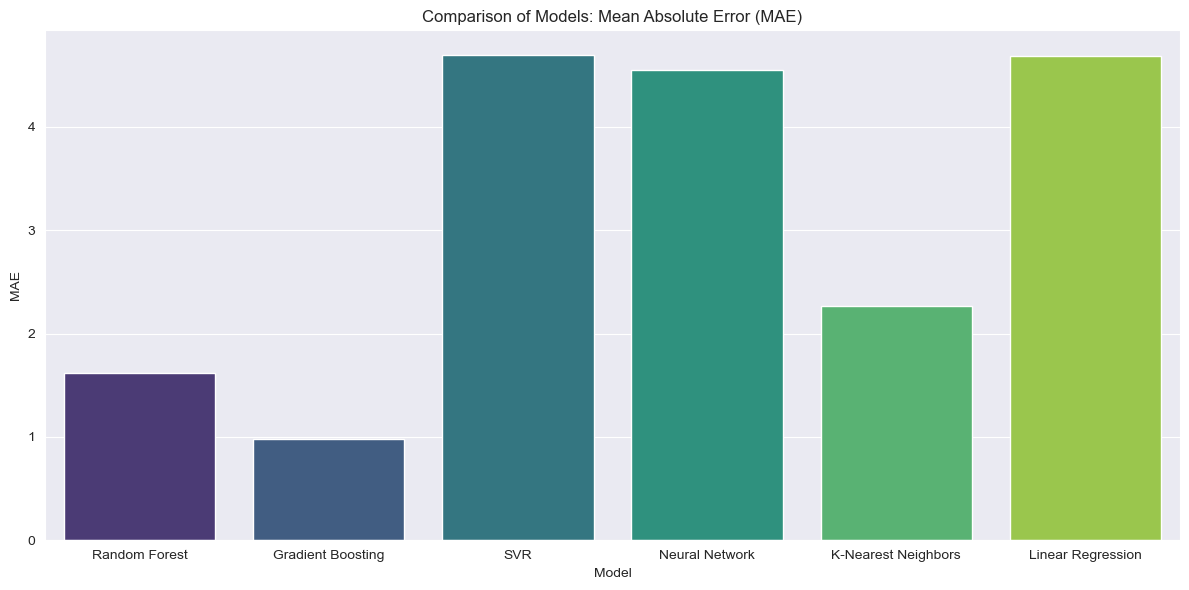

/var/folders/94/m0bs_x_s1hq990qf86vc0qkm0000gn/T/ipykernel_6196/1783263428.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, palette='coolwarm')


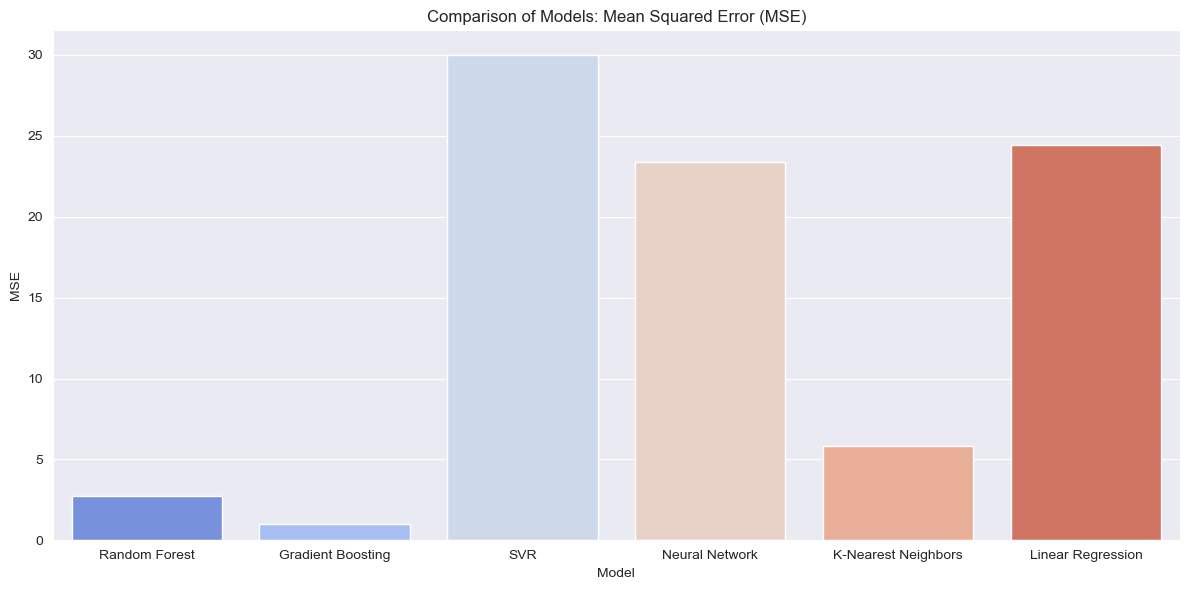

/var/folders/94/m0bs_x_s1hq990qf86vc0qkm0000gn/T/ipykernel_6196/1783263428.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=metrics_df, palette='rocket')


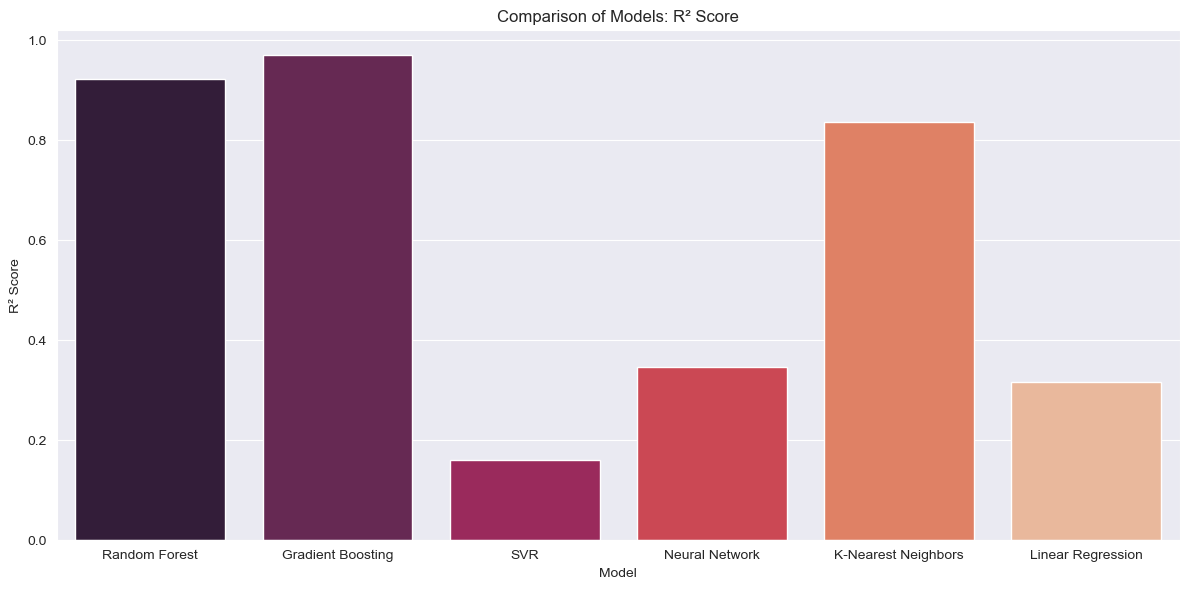

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Collect evaluation metrics for all models
metrics_data = {
    'Model': [
        'Random Forest',
        'Gradient Boosting',
        'SVR',
        'Neural Network',
        'K-Nearest Neighbors',
        'Linear Regression'
    ],
    'MAE': [mae, gb_mae, svr_mae, mlp_mae, knn_mae, linear_mae],
    'MSE': [mse, gb_mse, svr_mse, mlp_mse, knn_mse, linear_mse],
    'R2 Score': [r2, gb_r2, svr_r2, mlp_r2, knn_r2, linear_r2]
}

# Convert metrics data to a DataFrame for visualization
metrics_df = pd.DataFrame(metrics_data)

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='viridis')
plt.title('Comparison of Models: Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=metrics_df, palette='coolwarm')
plt.title('Comparison of Models: Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# Plot R2 Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Score', data=metrics_df, palette='rocket')
plt.title('Comparison of Models: R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.tight_layout()
plt.show()
